In [16]:
import pandas as pd
import numpy as np 
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
data = pd.read_csv('weatherLosAngeles.csv')
data = data.drop('preciptype', axis = 1)
data.head(5)

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"Los Angeles,USA",2022-01-01T00:00:00,48.3,48.3,41.6,77.68,0.0,0,0,0,...,1011.4,25.0,8.8,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"KHHR,72295023174,KBUR,KCQT,72295603167,7228749..."
1,"Los Angeles,USA",2022-01-01T01:00:00,48.9,48.9,43.2,80.38,0.0,0,0,0,...,1012.0,86.4,3.9,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"KHHR,72295023174,KBUR,KCQT,72295603167,7228749..."
2,"Los Angeles,USA",2022-01-01T02:00:00,49.9,49.3,42.0,74.19,0.0,0,0,0,...,1013.1,81.8,9.6,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"KHHR,72295023174,KBUR,KCQT,72295603167,7228749..."
3,"Los Angeles,USA",2022-01-01T03:00:00,48.2,48.2,39.0,70.43,0.0,0,0,0,...,1013.9,33.5,9.8,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"KHHR,72295023174,KBUR,KCQT,72295603167,7228749..."
4,"Los Angeles,USA",2022-01-01T04:00:00,48.1,48.1,38.7,69.61,0.0,0,0,0,...,1014.2,86.1,9.9,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"KHHR,72295023174,KBUR,KCQT,72295603167,7228749..."


### First we will make the data proper for the analysis by removing all those null values and also making sure that every data type is correct 

In [18]:
data = data.dropna() ##Since the length of the null value was less than the 5% of the total length of the dataset those null values were dropped
data.isna().sum() ##There are no null values in the whole dataset !

name                0
datetime            0
temp                0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
conditions          0
icon                0
stations            0
dtype: int64

In [19]:
data['datetime'] = pd.to_datetime(data['datetime']) ##The date column has been converted to the datetime type from the object datatype


**The data is now good for analysis** 

### Lets see how many times was the Predicted Weather and Actual Weather similar, in the below graph it shows number of occurance with the help of bar graph where each bar represents similar as predicted and not similar !

(0.0, 9000.0)

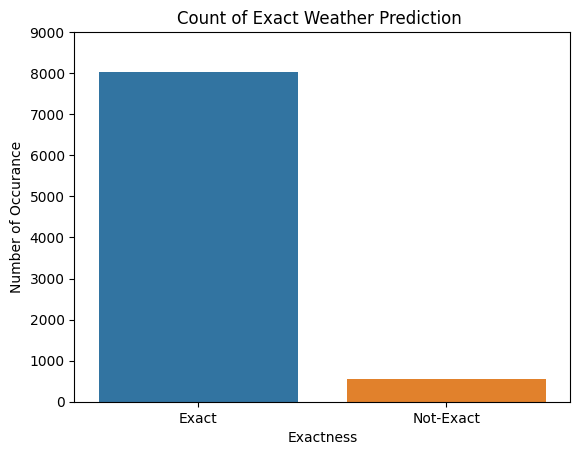

In [20]:
tempFeels = data.loc[:,['temp','feelslike']]
tempFeels['difference'] = np.abs(data['temp'] - data['feelslike'])
tempFeels['label'] = np.where(tempFeels['difference'] == 0, 'Exact','Not-Exact')
sns.countplot(x = tempFeels['label'], hue = tempFeels['label'])
plt.title('Count of Exact Weather Prediction ')
plt.xlabel('Exactness')
plt.ylabel('Number of Occurance')
plt.ylim(0,9000)

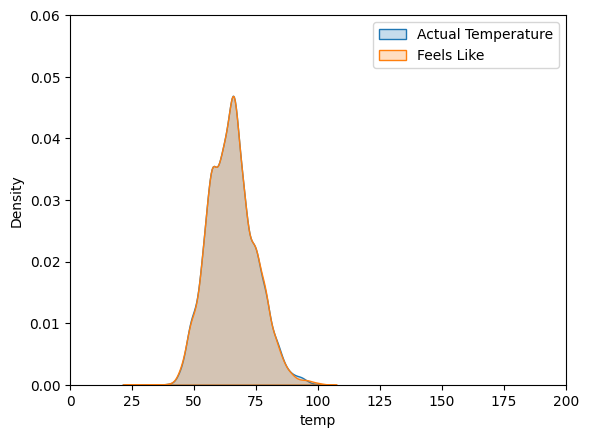

In [21]:
def feelsvsactual():   
    sns.kdeplot(data = data, x = 'temp', fill = True, label = 'Actual Temperature')
    sns.kdeplot(data = data, x = 'feelslike', fill = True,  label = 'Feels Like')
    plt.legend()
    plt.xlim(0,200)
    plt.ylim(0,0.06)

feelsvsactual()


### The feels like graph has overlapped the actual temperature graph near perfectly which shows that the prediction of the temperature has been correct most of the time. 

## Time Series Analysis of the Temperature in Los Angeles 

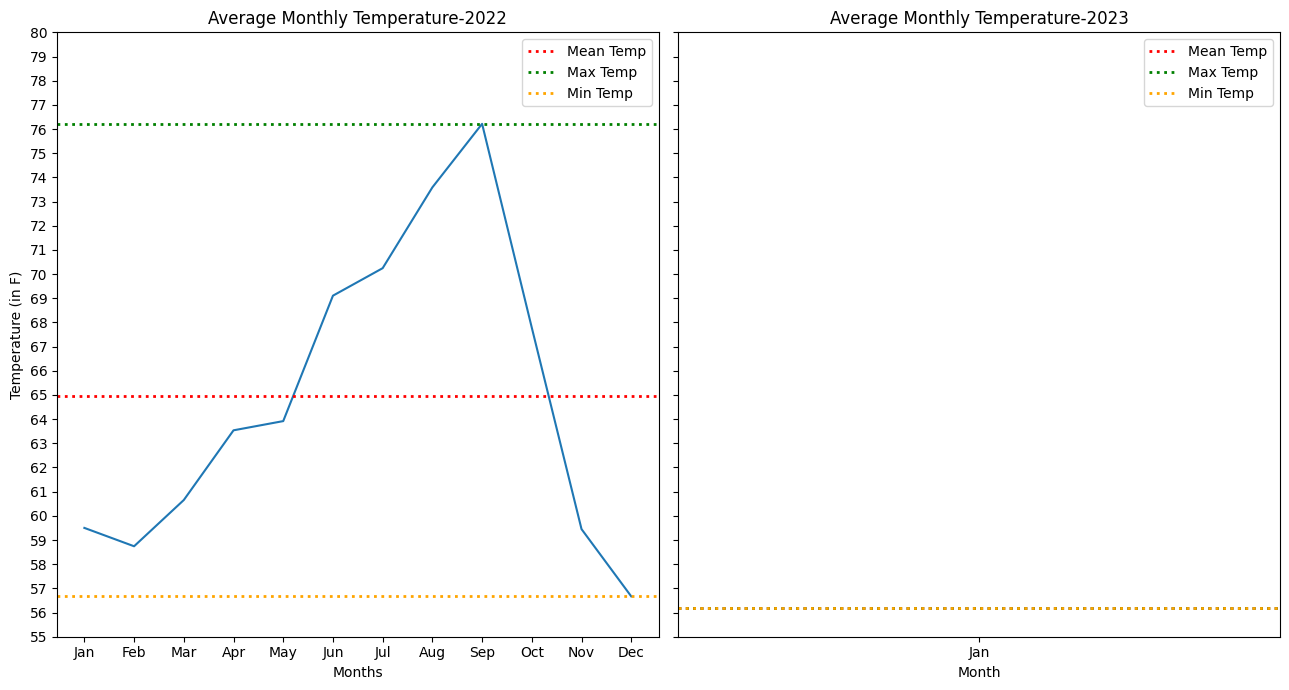

In [22]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
numberToActualMonth = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
data['Month'] = data['month'].map(numberToActualMonth)

monthlydewAverage = data.groupby(['year', 'Month'])['temp'].mean().reset_index()
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

monthlydewAverage['Month'] = pd.Categorical(
    monthlydewAverage['Month'],
    categories=month_order,
    ordered=True
)
dewdata2022 = monthlydewAverage[monthlydewAverage['year'] == 2022]
dewdata2023 = monthlydewAverage[monthlydewAverage['year'] == 2023]

dewmean2022 = np.mean(dewdata2022['temp'])
dewmean2023 = np.mean(dewdata2023['temp'])
duemax2022 = dewdata2022['temp'].max()
duemax2023 = dewdata2023['temp'].max()
duemin2022 = dewdata2022['temp'].min()
duemin2023 = dewdata2023['temp'].min()


fig,ax = plt.subplots(1,2, figsize = (13,7), sharey=True)

def plottingAsPerYear(axes,x, y , data, meanTemp, maxTemp, minTemp,title, xlabel, ylabel):
    sns.lineplot(x = x, y = y, data = data,ax = axes)
    axes.set_title(title)
    axes.set_ylim(55, 80)
    axes.set_yticks(np.arange(55, 81, 1))   
    axes.axhline(y=meanTemp, color='red', linestyle=':', linewidth=2, label='Mean Temp')
    axes.axhline(y=maxTemp, color='green', linestyle=':', linewidth=2, label='Max Temp')
    axes.axhline(y=minTemp, color='orange', linestyle=':', linewidth=2, label='Min Temp')
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.legend()
    plt.tight_layout()

plottingAsPerYear(ax[0],'Month', 'temp', dewdata2022, dewmean2022,duemax2022,duemin2022 ,'Average Monthly Temperature-2022','Months','Temperature (in F)')
plottingAsPerYear(ax[1],'Month', 'temp', dewdata2023, dewmean2023,duemax2023,duemin2023 ,'Average Monthly Temperature-2023','Month','Temperature (in F)')

## Time Series Analysis of Humidity in Los Angeles

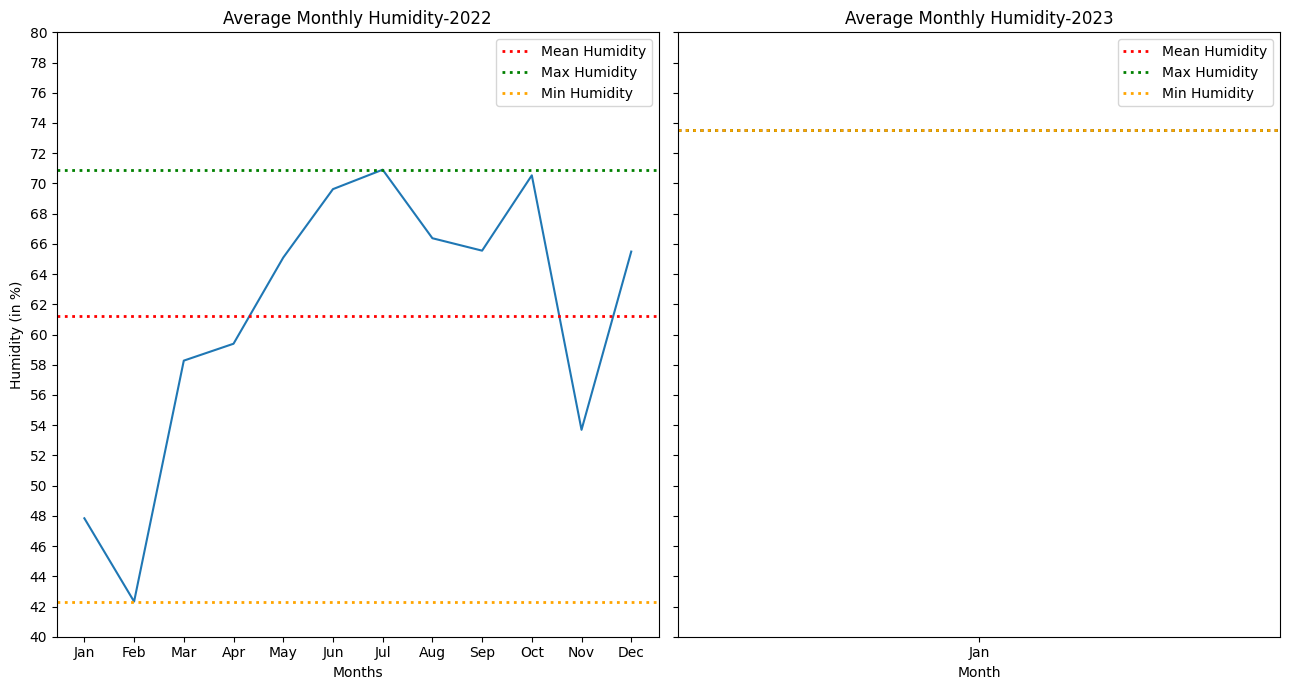

In [23]:
humidityData = data[['Month','humidity','year']]

hummonthlyAverage = data.groupby(['year', 'Month'])['humidity'].mean().reset_index()
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

hummonthlyAverage['Month'] = pd.Categorical(
    hummonthlyAverage['Month'],
    categories=month_order,
    ordered=True
)
datahum2022 = hummonthlyAverage[hummonthlyAverage['year'] == 2022]
datahum2023 = hummonthlyAverage[hummonthlyAverage['year'] == 2023]

meanhum2022 = np.mean(datahum2022['humidity'])
meanhum2023 = np.mean(datahum2023['humidity'])
maxhum2022 = datahum2022['humidity'].max()
maxhum2023 = datahum2023['humidity'].max()
minhum2022 = datahum2022['humidity'].min()
minhum2023 = datahum2023['humidity'].min()


fig,ax = plt.subplots(1,2, figsize = (13,7), sharey=True)


def humidityAsPerYear(axes,x, y , data, meanHumidity, maxHumidity, minHumidity,title, xlabel, ylabel):
    sns.lineplot(x = x, y = y, data = data,ax = axes)
    axes.set_title(title)
    axes.set_ylim(40, 80)
    axes.set_yticks(np.arange(40, 81, 2))   
    axes.axhline(y=meanHumidity, color='red', linestyle=':', linewidth=2, label='Mean Humidity')
    axes.axhline(y=maxHumidity, color='green', linestyle=':', linewidth=2, label='Max Humidity')
    axes.axhline(y=minHumidity, color='orange', linestyle=':', linewidth=2, label='Min Humidity')
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.legend()
    plt.tight_layout()

humidityAsPerYear(ax[0],'Month', 'humidity', datahum2022, meanhum2022,maxhum2022,minhum2022 ,'Average Monthly Humidity-2022','Months','Humidity (in %)')
humidityAsPerYear(ax[1],'Month', 'humidity', datahum2023, meanhum2023,maxhum2023,minhum2023 ,'Average Monthly Humidity-2023','Month','Humidity (in %)')

## Time Series Analysis of the Dew 

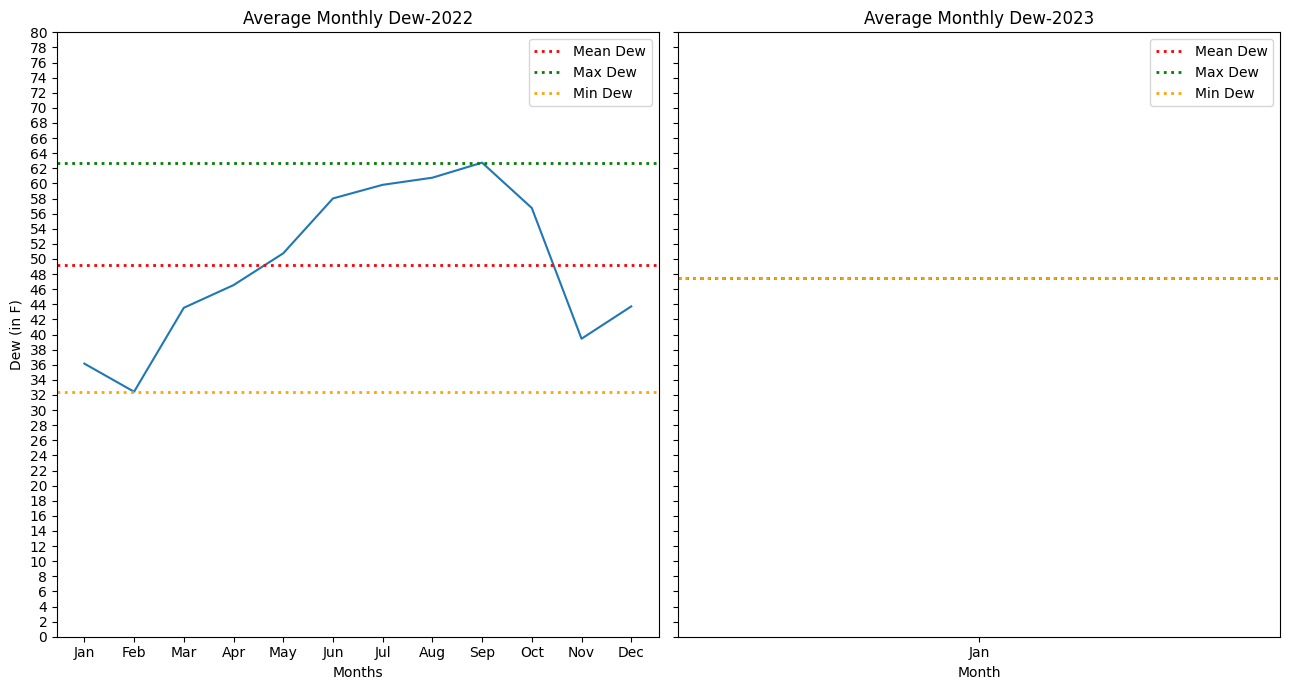

In [24]:
dewData = data[['dew','Month','year']]

monthlydewAverage = dewData.groupby(['year', 'Month'])['dew'].mean().reset_index()
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

monthlydewAverage['Month'] = pd.Categorical(
    monthlydewAverage['Month'],
    categories=month_order,
    ordered=True
)
dewdata2022 = monthlydewAverage[monthlydewAverage['year'] == 2022]
dewdata2023 = monthlydewAverage[monthlydewAverage['year'] == 2023]

dewmean2022 = np.mean(dewdata2022['dew'])
dewmean2023 = np.mean(dewdata2023['dew'])
duemax2022 = dewdata2022['dew'].max()
duemax2023 = dewdata2023['dew'].max()
duemin2022 = dewdata2022['dew'].min()
duemin2023 = dewdata2023['dew'].min()


fig,ax = plt.subplots(1,2, figsize = (13,7), sharey=True)

def plottingAsPerYear(axes,x, y , data, meanTemp, maxTemp, minTemp,title, xlabel, ylabel):
    sns.lineplot(x = x, y = y, data = data,ax = axes)
    axes.set_title(title)
    axes.set_ylim(28, 80)
    axes.set_yticks(np.arange(0, 81, 2))   
    axes.axhline(y=meanTemp, color='red', linestyle=':', linewidth=2, label='Mean Dew')
    axes.axhline(y=maxTemp, color='green', linestyle=':', linewidth=2, label='Max Dew')
    axes.axhline(y=minTemp, color='orange', linestyle=':', linewidth=2, label='Min Dew')
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.legend()
    plt.tight_layout()

plottingAsPerYear(ax[0],'Month', 'dew', dewdata2022, dewmean2022,duemax2022,duemin2022 ,'Average Monthly Dew-2022','Months','Dew (in F)')
plottingAsPerYear(ax[1],'Month', 'dew', dewdata2023, dewmean2023,duemax2023,duemin2023 ,'Average Monthly Dew-2023','Month','Dew (in F)')

## Let's move on to further analysis of the weather of Los Angeles 

### Let's visualize the windspeed of LosAngeles in 2022 and 2023 using the KDEPLOT. A kdeplot is one of the best tool to show the data in terms of density and frequency 
## Note: Taller regions of graph = Higher Density = Most Occurance of the Wind Speed

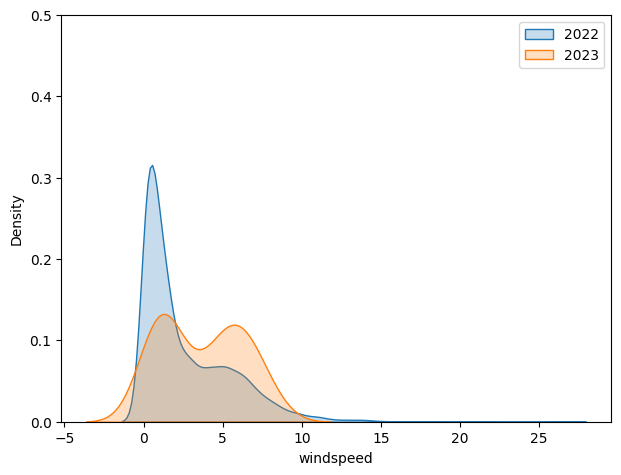

In [25]:
##Windspeed 
windspeed = data[['windspeed','year']]
sns.kdeplot(data = windspeed[windspeed['year'] == 2022], x = 'windspeed',fill = True, label = '2022')
sns.kdeplot(data = windspeed[windspeed['year'] == 2023], x = 'windspeed',fill = True, label = '2023')
plt.legend()
plt.tight_layout()
plt.ylim(0,0.5)
plt.show()


### The above kde plot shows the density from which we can easily assume that in 2022, most of the time, the windspeed was ranging around 0-3, whereas in 2023 it was in between -3, 10 

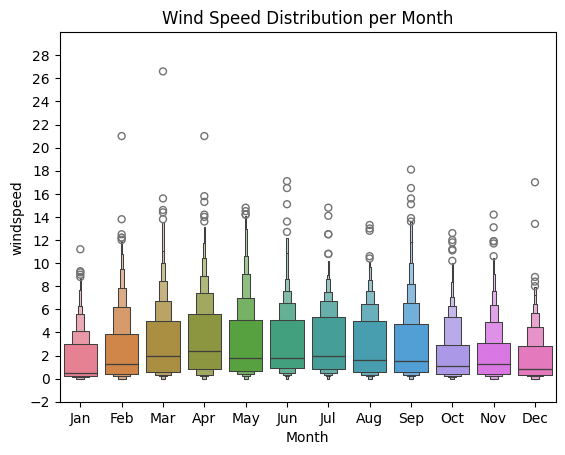

In [26]:
sns.boxenplot(x="Month", y="windspeed", data=data, hue = 'Month')
plt.title("Wind Speed Distribution per Month")
plt.ylim(-2,30)
plt.yticks(np.arange(-2,30,2))
plt.show()

## I have choose boxenplot over boxplot becuase of the size of the data, outliers, and to reach every single details 

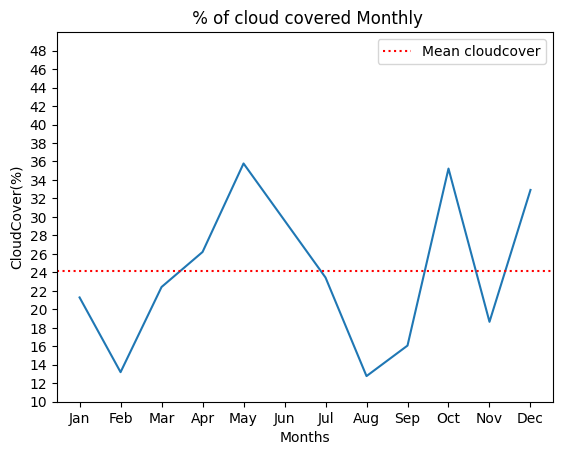

In [27]:
cloudyData= data.loc[:,['Month','cloudcover']]
monthlyData = cloudyData.groupby('Month')['cloudcover'].mean().reset_index()
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthlyData['Month'] = pd.Categorical(monthlyData['Month'], categories=month_order, ordered = True)
meanCover = cloudyData['cloudcover'].mean()
sns.lineplot(x = 'Month', y = 'cloudcover', data = monthlyData)
plt.xlabel('Months')
plt.ylabel('CloudCover(%)')
plt.ylim(10,50)
plt.title(" % of cloud covered Monthly")
plt.axhline(y = meanCover, color = 'red', linestyle = ':', label = "Mean cloudcover")
plt.yticks(np.arange(10,50,2))
plt.legend()
plt.show()

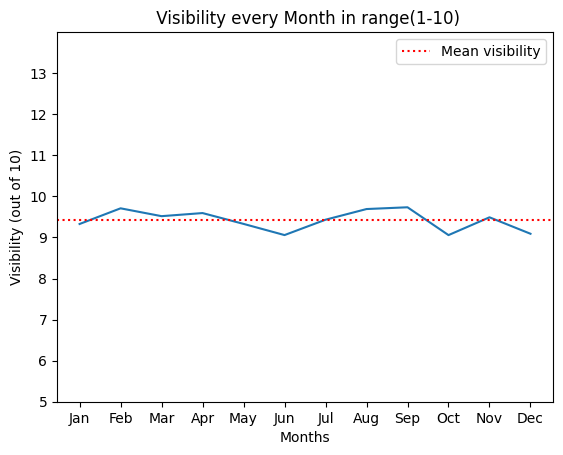

In [28]:
##visibility vs cloud cover 
## How visible the sky is ? 

visibleData = data[['Month','visibility']]
meanVisibility = visibleData.groupby('Month')['visibility'].mean().reset_index()
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
meanVisibility['Month'] = pd.Categorical(meanVisibility['Month'], categories= month_order, ordered=True)
meanVisible = meanVisibility['visibility'].mean()
sns.lineplot(x = 'Month', y = 'visibility', data = meanVisibility)
plt.xlabel('Months')
plt.ylabel('Visibility (out of 10)')
plt.ylim(5,14)
plt.title(" Visibility every Month in range(1-10)")
plt.axhline(y = meanVisible, color = 'red', linestyle = ':', label = "Mean visibility")
plt.yticks(np.arange(5,14,1))
plt.legend()
plt.show()

In [42]:
def conditionalVisibility():
    averageConditions = weatherAndVisiblity.groupby('conditions')['visibility'].mean().reset_index()
    sns.barplot(x = 'conditions', y = 'visibility', data = averageConditions, hue = 'conditions')
    plt.ylim(5,10)
    plt.xticks(rotation = 30)
    plt.ylabel("Average Visibility")
    plt.title("Average visibility across conditions")
    plt.show()


---


# HYPOTHESIS TESTING

## Lets tackle some questions related to the dataset and seperate if it is null hypothesis or alternative hypothesis

## Before testing out the questions it is always the good practice to evaluate if the column of the dataset is normally distributed or not !

---


## Null Hypothesis(H₀): There is no difference between actual temperature and feels-like temperature.
 

In [83]:
from scipy.stats import shapiro
tempFeels ##It is the dataset containing the temp and feels like column 
stat, p = shapiro(tempFeels['difference']) ##p < 0.05 (Not - Normally distributed) (Non - Parametric Testing)

In [ ]:
from scipy.stats import wilcoxon
statistics , pValue = wilcoxon(tempFeels['temp'], tempFeels['feelslike'], alternative = 'two-sided')
print(statistics, pValue)


71233.5 0.39035660477689915


### Since the p-value > 0.05 we fail to reject null hypothesis ! 
### Hence, there is no difference between actual and feels like temperature which can be prooved by the wilcoxon test and the graph below 
### Although there were few case scenarios where the difference was seen, but most of the time the difference was unnoticable 

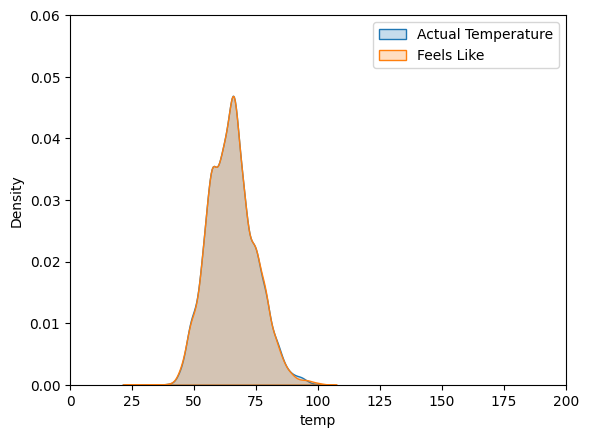

In [ ]:
feelsvsactual()

---


## Null Hypothesis(H₀): The average visibility is the same across all weather conditions

In [86]:
weatherConditions = data['conditions'].unique()
for eachCondition in weatherConditions:
    statistics, pValue = shapiro(data[data['conditions'] == eachCondition]['visibility'])
    print(f"{eachCondition}: P-Value {pValue}")

Clear: P-Value 2.9897149941312102e-92
Overcast: P-Value 1.5562022207543836e-42
Partially cloudy: P-Value 1.1128211398126267e-40
Rain, Overcast: P-Value 1.1538366629238786e-10
Rain, Partially cloudy: P-Value 3.0087943518338903e-07
Rain: P-Value 0.00013097817774592886


### Since p-value of every single parameter is less than 0.05 it means it is not normally distributed! So we follow the kruskal method of Non Parametric Testing

In [ ]:
import pingouin as pg
weatherAndVisiblity = data[['conditions', 'visibility']]
result = pg.kruskal(data = weatherAndVisiblity, dv = 'visibility', between = 'conditions')
print(result) # p < 0.05

             Source  ddof1            H          p-unc
Kruskal  conditions      5  1355.515914  5.989571e-291


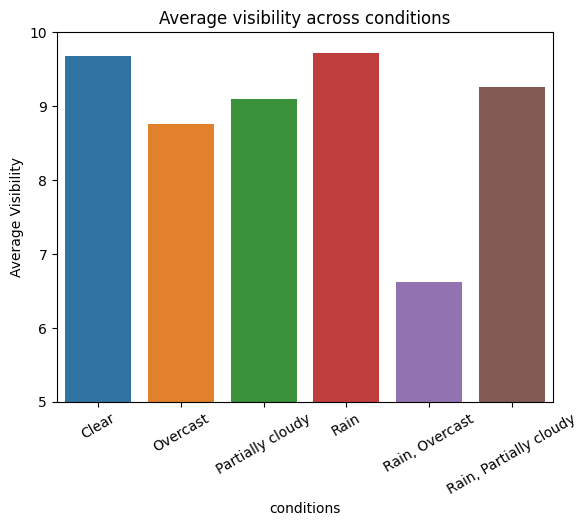

In [ ]:
conditionalVisibility()

### Since the p value is less than 0.05 we can reject the null hypothesis and claim the alternative hypothesis: The average visibility is different across different conditions

---


## Null Hypothesis = There is no monotonic correlation between cloud cover and visibility.

In [87]:
#Cloud Cover and visibility 
cloudedvisibility = data[['cloudcover','visibility']]


In [84]:
## Checking for the normality 
from scipy.stats import shapiro
stats1, p1  = shapiro(cloudedvisibility['cloudcover']) ## p < 0.05 (Non-parametric Testing)
stats2, p2  = shapiro(cloudedvisibility['cloudcover']) ## p < 0.05 (Non Parametric Testing)


In [74]:
##Since it is non parametric testing we do the spearmanr method 
from scipy.stats import spearmanr
statistics, pValue = spearmanr(cloudedvisibility['cloudcover'], cloudedvisibility['visibility'], alternative = 'two-sided')
print(pValue) # p < 0.05 ## 4.91e-285

4.919827987847019e-285


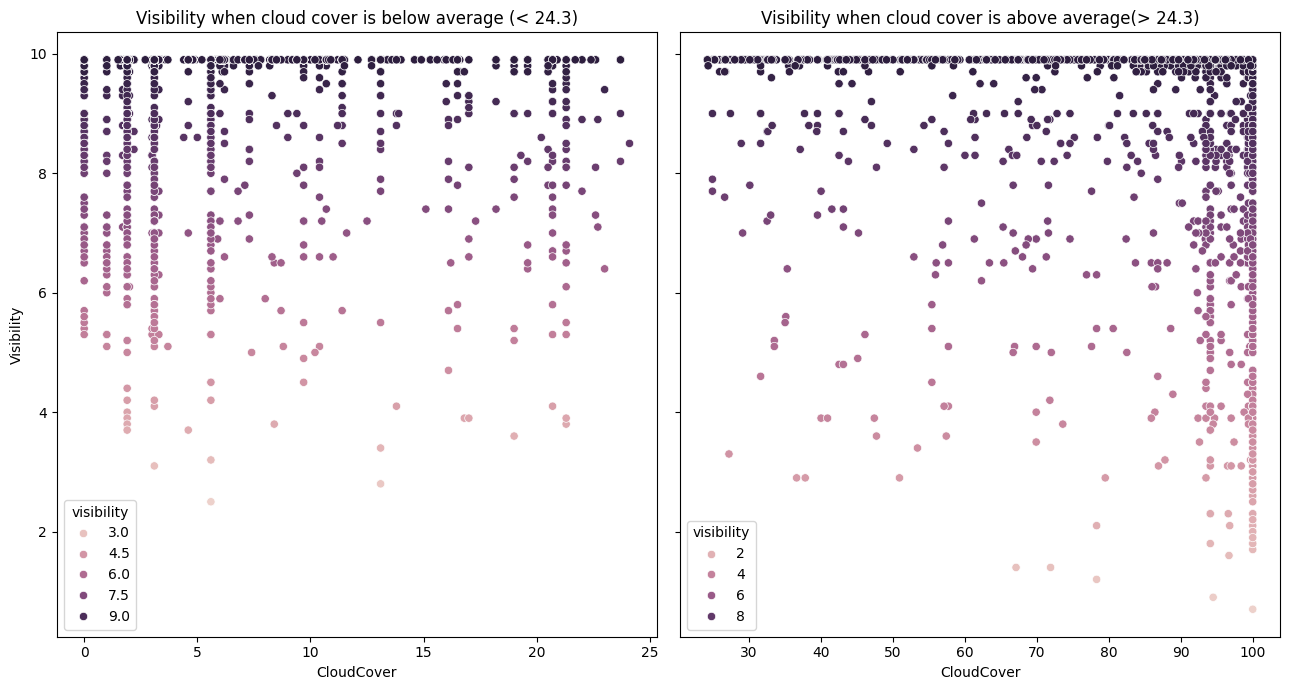

In [81]:
meanCloudCoverData = cloudedvisibility['cloudcover'].mean()
aboveMeanVisibility = cloudedvisibility[cloudedvisibility['cloudcover'] >= meanCloudCoverData]
belowMeanVisibility = cloudedvisibility[cloudedvisibility['cloudcover'] <= meanCloudCoverData]
fig,ax = plt.subplots(1,2, figsize = (13,7), sharey=True)
def cloudedVisiblity(axes, x, y ,hue, data, title, xlabel,ylabel):
    sns.scatterplot(x = x, y = y, data = data, hue = hue, ax = axes)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)

cloudedVisiblity(ax[0],'cloudcover', 'visibility','visibility', belowMeanVisibility,'Visibility when cloud cover is below average (< 24.3)','CloudCover','Visibility')
cloudedVisiblity(ax[1],'cloudcover', 'visibility','visibility', aboveMeanVisibility,'Visibility when cloud cover is above average(> 24.3)','CloudCover','Visibility')

plt.tight_layout()
plt.show()

### When cloud cover is below average, visibility is consistently high—typically above 9. In contrast, higher cloud cover is associated with a wider spread in visibility, including many low-visibility observations.
##  Based on the Spearman correlation test, we reject the null hypothesis and conclude that cloud cover and visibility are significantly related.


---


## Project Conclusion

This weather data analysis project involved a comprehensive exploratory and statistical examination of multiple meteorological variables across two years (2022 and 2023). The goal was to uncover patterns, relationships, and insights from features such as temperature, humidity, visibility, cloud cover, and weather conditions.

### Key EDA Insights:
- **Temperature Trends**: Both 2022 and 2023 showed seasonal variation, with average monthly temperatures peaking mid-year.
- **Humidity Patterns**: Humidity remained relatively stable but showed slight year-on-year differences.
- **Visibility & Cloud Cover**: Visibility tended to decrease as cloud cover increased, especially when cloud cover was above the mean.
- **Feels-like Temperature**: In most cases, the actual and feels-like temperatures were statistically similar, with very few extreme differences.

### Hypothesis Testing Summary:
1. **Actual vs. Feels-like Temperature**:  
   - *Wilcoxon Test*: p > 0.05  
   - → We failed to reject the null hypothesis. No significant difference found.
2. **Does Weather Condition Affect Visibility?**  
   - *Kruskal–Wallis Test*: p < 0.05  
   - → We rejected the null hypothesis. Weather conditions do affect visibility.
3. **Cloud Cover vs. Visibility Correlation**:  
   - *Spearman Correlation*: p < 0.05, negative coefficient  
   - → We rejected the null hypothesis. Cloud cover is negatively correlated with visibility.

### Final Conclusion:
The project successfully demonstrated how exploratory data analysis combined with hypothesis testing can uncover meaningful relationships in environmental data. It highlighted the importance of context-aware visualization and statistical validation in driving insights.


**~Sujal Adhikari**
